In [2]:
pip install matplotlib -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\lcard\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# fazendo a leitura da base da polícia rodoviária federal e mostrando a 1º linha
df_base = pd.read_csv('ca-2004-01.csv', sep=';', encoding= 'latin1')
df_base['Valor de Venda'] = df_base['Valor de Venda'].str.replace(',', '.', regex=False).astype(float)
df_base['Valor de Compra'] = df_base['Valor de Compra'].str.replace(',', '.', regex=False).astype(float)
df_base['Data da Coleta'] = pd.to_datetime(df_base['Data da Coleta'], format='%d/%m/%Y')
df_base.head(1)

,ï»¿Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,2004-05-11,1.967,1.6623,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [ ]:
# selecionando o produto gasolina dentro da base
df_gasolina = df_base.loc[df_base['Produto'] == 'GASOLINA']
df_gasolina.head(1)

,ï»¿Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,2004-05-11,1.967,1.6623,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [ ]:
df_base.info() # gerando um guia de informação sobre a base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281531 entries, 0 to 281530
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ï»¿Regiao - Sigla  281531 non-null  object        
 1   Estado - Sigla     281531 non-null  object        
 2   Municipio          281531 non-null  object        
 3   Revenda            281531 non-null  object        
 4   CNPJ da Revenda    281531 non-null  object        
 5   Nome da Rua        281531 non-null  object        
 6   Numero Rua         281358 non-null  object        
 7   Complemento        92233 non-null   object        
 8   Bairro             280713 non-null  object        
 9   Cep                281531 non-null  object        
 10  Produto            281531 non-null  object        
 11  Data da Coleta     281531 non-null  datetime64[ns]
 12  Valor de Venda     281531 non-null  float64       
 13  Valor de Compra    195235 non-null  float64 

In [ ]:
# agrupando o valor de venda com os municípios
df_gasolina_media_mun = df_gasolina.groupby(['Municipio'])['Valor de Venda'].sum().reset_index()
df_gasolina_media_mun= df_gasolina_media_mun.sort_values(by='Valor de Venda',ascending= False)
df_gasolina_media_mun.head(5)

,Municipio,Valor de Venda
530,SAO PAULO,12206.490
463,RIO DE JANEIRO,6211.479
177,CURITIBA,2523.169
202,FORTALEZA,2267.654
87,BRASILIA,2243.055


In [ ]:
# fazendo um array dos valores de venda
valores = np.array(df_base['Valor de Venda'])
valores

array([1.967, 0.899, 1.299, ..., 1.41 , 1.49 , 1.44 ], shape=(281531,))

In [ ]:
#encontrando os quartis
q1 = np.percentile(valores, 25)
q2 = np.percentile(valores, 50)
q3 = np.percentile(valores,75)

In [ ]:
# informando os quartis
print(f'Primeiro quartil (q1): {q1}')
print(f'Segundo quartil (q2): {q2}')
print(f'Terceiro quartil (q3): {q3}')

Primeiro quartil (q1): 1.25
Segundo quartil (q2): 1.439
Terceiro quartil (q3): 1.95


In [ ]:
# dados estatísticos
media = np.mean(valores)
mediana = np.median(valores)
iqr = q3 - q1
limite_sup = q3 +(1.5 * iqr)
limite_inf = q1 - (1.5 * iqr)
distancia = (media - mediana)/mediana
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Intervalo interquartil (IQR): {iqr}')
print(f'Limite superior: {limite_sup}')
print(f'Limite inferior: {limite_inf}')
print(f'Distância entre média e mediana: {distancia}')

Média: 1.5256354309116937
Mediana: 1.439
Intervalo interquartil (IQR): 0.7
Limite superior: 3.0
Limite inferior: 0.20000000000000018
Distância entre média e mediana: 0.06020530292681979


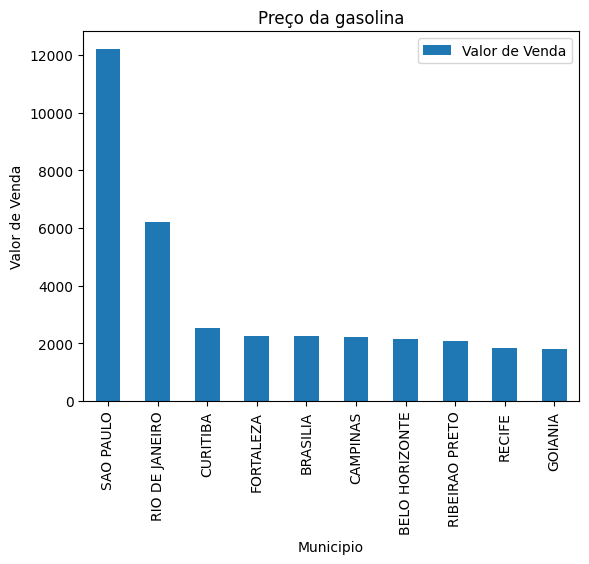

In [ ]:
df_gasolina_media_mun_plot = df_gasolina_media_mun.head(10)  # Selecionando os 10 primeiros municípios com mais vendas
df_gasolina_media_mun_plot.plot(kind = 'bar', x='Municipio',y='Valor de Venda')
plt.xlabel('Municipio')
plt.ylabel('Valor de Venda')
plt.title('Preço da gasolina')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

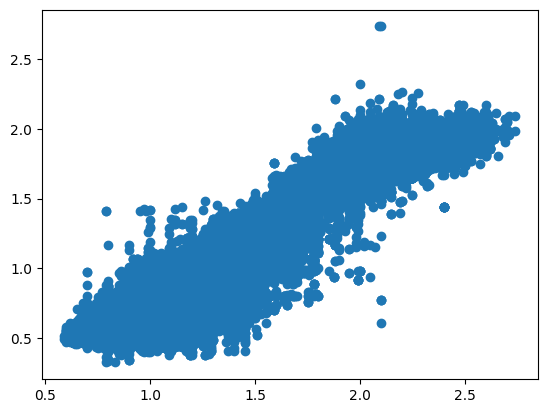

In [ ]:
# fazendo a mescla entre valores de venda e de compra
plt.scatter(df_base['Valor de Venda'],df_base['Valor de Compra'])
plt.show

In [ ]:
# agrupando o valor de venda com estado
df_gasolina_media_est = df_gasolina.groupby(['Estado-Sigla'])['Valor de Venda'].sum().reset_index()
df_gasolina_media_est= df_gasolina_media_est.sort_values(by='Valor de Venda',ascending= False)
df_gasolina_media_est

In [ ]:
df_gasolina_media_est_plot = df_gasolina_media_est.head(10)  # Selecionando os 10 primeiros estados com mais vendas
df_gasolina_media_est_plot.plot(kind = 'bar', x='Estado',y='Valor de Venda')
plt.xlabel('Estado')
plt.ylabel('Valor de Venda')
plt.title('Preço da gasolina por Estado')
plt.show()